## [N - ary Level Order Traversal](https://leetcode.com/problems/n-ary-tree-level-order-traversal/description/)

Given an n-ary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).

For example, given a 3-ary tree:

 
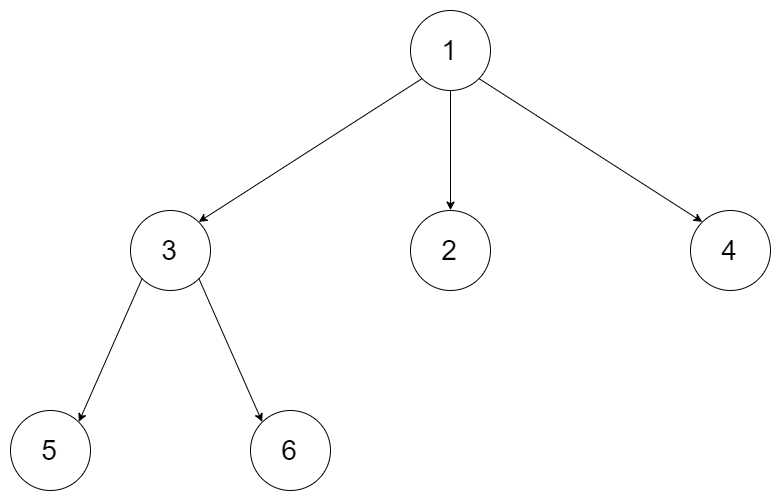

 
We should return its level order traversal:

``` 
[
     [1],
     [3,2,4],
     [5,6]
]
 
```
Note:

```
The depth of the tree is at most 1000.
The total number of nodes is at most 5000.
```

In [2]:
# Definition for a Node.
class Node(object):
    def __init__(self, val, children):
        self.val = val
        self.children = children
        

from collections import deque

class Solution(object):
    def levelOrder(self, root):
        """
        :type root: Node
        :rtype: List[List[int]]
        """
        # almost same as the first attempt, with minor changes to
        # core function of traversing. This logic works without
        # explicit level tracking, at a slight expense of extra
        # storage to store references to all nodes at a given
        # level.
        
        if not root:
            return []
        
        queue = deque()
        valuesInLevelOrder = []
        
        queue.append(root)
        
        while queue:
            # pop from the queue
            nodesAtCurLevel = [queue.popleft() for _ in range(len(queue))]
            
            valuesAtCurLevel = []
            
            for node in nodesAtCurLevel:
                # process the node
                valuesAtCurLevel.append(node.val)
            
                # add children to the queue
                if node.children:
                    for child in node.children:
                        queue.append(child)
            
            valuesInLevelOrder.append(valuesAtCurLevel)
        
        return valuesInLevelOrder
    
    def levelOrderFirstAttempt(self, root):
        """
        :type root: Node
        :rtype: List[List[int]]
        """
        
        # level order.. we need a queue to add nodes in FIFO
        # visit node from the root.. add children to the queue 
        # and process them
        
        queue = deque()
        valuesInLevelOrder = []
        
        # need values in the order of levels. one list per level
        # so keep track of level as well
        
        # edge cases
        # empty root
        if not root:
            return []
        
        queue.append((root, 0)) # 0 is the level of the root
        
        while queue:
            node, level = queue.popleft()
            
            # process the node
            # need to insert to the right level
            while len(valuesInLevelOrder) <= level:
                valuesInLevelOrder.append([])
            
            valuesInLevelOrder[level].append(node.val)
            
            # add the children to the queue
            if node.children:
                for child in node.children:
                    queue.append((child, level+1))
        
        return valuesInLevelOrder

No complex testcases to this question for now. I need to write a N-ary tree generator sometime.

In [4]:
testRoot = Node(1, [Node(3, [Node(5, None), Node(6, None)]), Node(2, None), Node(4, None)])
expList = [
    [1], 
    [3, 2, 4],
    [5, 6]
]

s = Solution()
levelOrderValues = s.levelOrder(testRoot)

for index, levelOrderValue in enumerate(levelOrderValues):
    assert expList[index] == levelOrderValue

### Complexities
* Time - O(N) - visit all nodes in the tree
* Space - O(W) - max width of the tree. width = number of nodes in a given level